### 1  Importation

In [385]:
import pandas as pd
import numpy as np
import pickle
import plotly.express as px
import time
import requests

In [386]:
# Replace YOUR_API_KEY with your actual API key
api_key = "06af3e1b654bb9481c777bde394b620b"

# Set the base URL for the TMDB API
base_url = 'https://api.themoviedb.org/3/'

# Set the parameters for the API request
params = {
    'api_key': api_key,
    'language': 'en-US',
    'include_adult': 'false',
    'sort_by': 'primary_release_date.asc',
    'primary_release_date.gte': '2000-01-01',
    'primary_release_date.lte': '2005-12-31',
    'page': 1
}

# Initialize an empty list to store the movie data
movies = []

# Set a flag to indicate whether there are more pages to request
more_pages = True

# Start time and iteration index
start_time = time.time()
iteration = 1

while more_pages:        
    # Stop condition
    if iteration == 150:
        break

    # Make the API request
    response = requests.get(f'{base_url}discover/movie', params=params)

    # Check the status code to make sure the request was successful
    if response.status_code == 200:
        # Loop through the results and make a separate API request for each movie
        for movie in response.json()['results']:
            # Set the movie ID for the API request
            movie_id = movie['id']

            # Make the API request for the movie details
            movie_response = requests.get(f'{base_url}movie/{movie_id}', params={'api_key': api_key})

            # Check the status code to make sure the request was successful
            if movie_response.status_code == 200:
                # Add the movie data to the list
                movies.append(movie_response.json())

        # Update the page number for the next request
        params['page'] += 1

        # Check if there are more pages to request
        if params['page'] > response.json()['total_pages']:
            more_pages = False
    else:
        print(f'Request failed with status code {response.status_code}')
        break
        
    iteration += 1
    # Verbose printing
    if iteration % 50 == 0:
        print(f"Iteration {iteration}. Elapsed time {time.time() - start_time} seconds.")

# Load the movie data into a pandas DataFrame
movies_df = pd.DataFrame(movies)

Iteration 50. Elapsed time 80.17385077476501 seconds.
Iteration 100. Elapsed time 165.61662912368774 seconds.
Iteration 150. Elapsed time 253.82890510559082 seconds.


In [387]:
movies_df.to_pickle("./data/movies_tmdb.pkl")

In [510]:
movies_df = pd.read_pickle("./data/movies_tmdb.pkl")

In [548]:
movies_df.shape

(2980, 14)

### 2 Analyse descriptive

In [511]:
# Cleaning : 

def traitement_variable(ligne_variable):
    genres = []
    for i in ligne_variable:
        genres.append(i["name"])    
    return genres

movies_df["genres"] = movies_df["genres"].apply(traitement_variable)
movies_df["production_countries"] = movies_df["production_countries"].apply(traitement_variable)
movies_df["production_companies"] = movies_df["production_companies"].apply(traitement_variable)


In [512]:
movies_df.columns

Index(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [513]:
# Remove columns
movies_df=movies_df.drop(columns =['adult','backdrop_path', 'belongs_to_collection', 'homepage', 'id', 'imdb_id', 
                                  'original_title','overview','poster_path', 'status', 'video'])

In [514]:
movies_df.columns

Index(['budget', 'genres', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'tagline', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

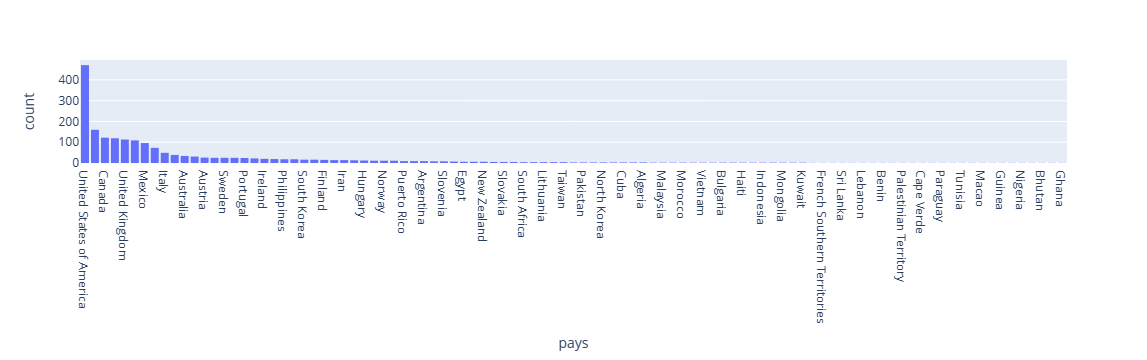

In [515]:
# The most represented countries
pays = movies_df["production_countries"]

acc_pays= []
for countries in range(len(pays)):
    acc_pays.extend(pays[countries])

colums=["pays"]
data=acc_pays

df_countries=pd.DataFrame(data=acc_pays, columns=colums)

px.histogram(df_countries, x="pays").update_xaxes(categoryorder='total descending').show()

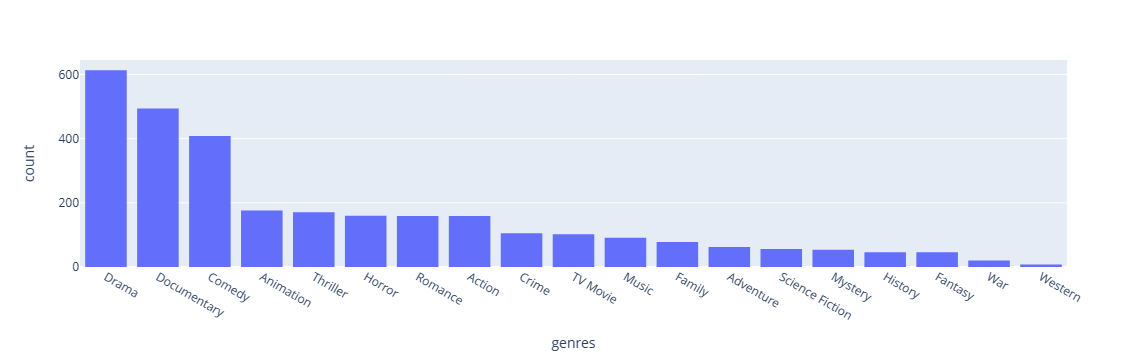

In [516]:
# The most represented genres
genres = movies_df["genres"]

acc_genres= []
for genre in range(len(genres)):
    acc_genres.extend(genres[genre])

colums=["genres"]
data=acc_genres

df_genres=pd.DataFrame(data=acc_genres, columns=colums)

px.histogram(df_genres, x="genres").update_xaxes(categoryorder='total descending').show()

In [542]:
movies_df.columns

Index(['budget', 'genres', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'tagline', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

In [544]:
movies_df.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,2.980000e+03,2980.000000,2.980000e+03,2980.000000,2980.000000,2980.000000
mean,4.608149e+05,1.252064,7.566489e+05,51.612081,2.483330,22.306711
std,4.498101e+06,2.940408,9.285770e+06,53.057841,3.022464,247.717863
min,0.000000e+00,0.600000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.600000,0.000000e+00,4.000000,0.000000,0.000000
50%,0.000000e+00,0.600000,0.000000e+00,50.000000,0.000000,0.000000
75%,0.000000e+00,0.841000,0.000000e+00,90.000000,5.200000,2.000000
max,9.500000e+07,63.485000,2.562713e+08,1273.000000,10.000000,8711.000000


In [547]:
movies_df.loc[movies_df["vote_average"]==0]

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count
0,0,[Horror],de,1.001,[Transcendental Pictures],[Germany],2000-01-01,0,16,"[{'english_name': 'German', 'iso_639_1': 'de',...",,Amok - Der Fluch der Maske,0.0,0
1,0,[Horror],de,0.600,[Fist Productions],[Germany],2000-01-01,0,34,"[{'english_name': 'German', 'iso_639_1': 'de',...",,Silent but Violent,0.0,0
2,0,[],es,0.600,[],[],2000-01-01,0,53,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",,Rómulo Gallegos. Horizons and pathways,0.0,0
4,0,[Drama],ja,0.600,[],[Japan],2000-01-01,0,120,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",,Airline Stewardesses Black Uniform,0.0,0
5,0,[],en,0.600,"[GMP Pictures, Rounds Entertainment]",[],2000-01-01,0,90,[],,Oranges: The Movie,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2970,0,[Horror],zh,0.627,[],[],2000-04-13,0,80,"[{'english_name': 'Mandarin', 'iso_639_1': 'zh...",,Phantom of Snake,0.0,0
2971,0,[],en,0.600,[],[],2000-04-13,0,83,[],,The Dummy,0.0,0
2973,0,[],en,0.600,[],[],2000-04-13,0,70,[],,The Daily Nation,0.0,0
2975,0,[],en,0.600,[],[],2000-04-13,0,0,[],,Shirley Pimple in the John Wayne Temple of Doom,0.0,0


In [517]:
df_Revenue_Countries= movies_df[['production_countries','revenue']]

In [518]:
df_Revenue_Countries

,production_countries,revenue
0,[Germany],0
1,[Germany],0
2,[],0
3,[France],0
4,[Japan],0
...,...,...
2975,[],0
2976,"[Australia, United States of America]",0
2977,"[Czech Republic, Slovenia]",0
2978,"[Canada, United States of America]",34266564


In [541]:
def premier_terme(ligne_pays):
    liste_countries = []
    liste_countries.append(ligne_pays[0])
    return liste_countries

df_Revenue_Countries["pays"] = df_Revenue_Countries["production_countries"].apply(premier_terme)
df_Revenue_Countries

IndexError: list index out of range

### 3 Modélisation